In [29]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


In [3]:
def Calculating_Confidence_intervals(sigma):
    numbers =np.random.normal(0,1,10000)
    numbersInInterval=numbers[(numbers>=-sigma)&(numbers<=sigma)]
    return len(numbersInInterval)/len(numbers)
print(str(Calculating_Confidence_intervals(1)*100)+'%')

68.19%


In [4]:
def get_confidence_intervals(z_score):
    first = st.norm.cdf(-z_score)
    second = st.norm.cdf(z_score)
    return second-first
print(get_confidence_intervals(1.96))


0.950004209704


In [5]:
def conf_interval_two_numbers(z_scoreOne,z_scoreTwo):
    first = st.norm.cdf(z_scoreOne)
    second = st.norm.cdf(z_scoreTwo)
    return second-first
print(conf_interval_two_numbers(0,1000))

0.5


In [9]:
def get_z_score(confidence_interval):
    num =(confidence_interval+1)/2
    return st.norm.ppf(num)
print(get_z_score(0.95))

1.95996398454


In [16]:
height_data= pd.read_table("heights.csv")
height_mean=height_data.Height.mean()
height_std=height_data.Height.std(ddof=1)
def real_confidence_intervals(confFraction,mean,std):
    lower_area=(1-confFraction)/2
    upper_area=(1+confFraction)/2
    return [
        st.norm.ppf(lower_area,mean,std),
        st.norm.ppf(upper_area,mean,std)
    ]
print(real_confidence_intervals(0.5,height_mean,height_std))

[155.70793065941257, 163.841926890445]


In [25]:
sample = st.norm.rvs(5,10,500000)
print(st.ttest_1samp(sample,5).pvalue)
print(st.ttest_1samp(sample,6).pvalue)
print(st.ttest_1samp(sample,4).pvalue)
print(st.ttest_1samp(sample,0).pvalue)
print(st.ttest_1samp(sample,5.1).pvalue)
print(st.ttest_1samp(sample,4.9).pvalue)

0.150274226802
0.0
0.0
0.0
1.90343617948e-17
1.8807409274e-08


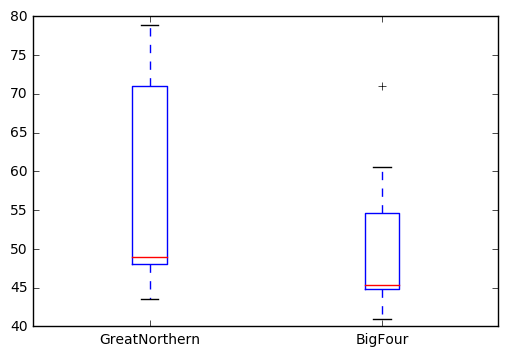

Ttest_indResult(statistic=1.312336706487564, pvalue=0.20792200785311768)


In [48]:
grain_data=pd.read_table("grain_data.csv")
grain_data.head()
#GreatNorthern
#BigFour
plt.boxplot([grain_data["GreatNorthern"],grain_data['BigFour']])
plt.xticks([2,1],{"GreatNorthern",'BigFour'})
plt.show()
print(st.ttest_ind(grain_data.GreatNorthern, grain_data.BigFour))

In [57]:
water_data=pd.read_table("water_data.csv")
water_data.head()
print(st.ttest_rel(water_data.bottom,water_data.surface).pvalue/2)

0.000445557728911


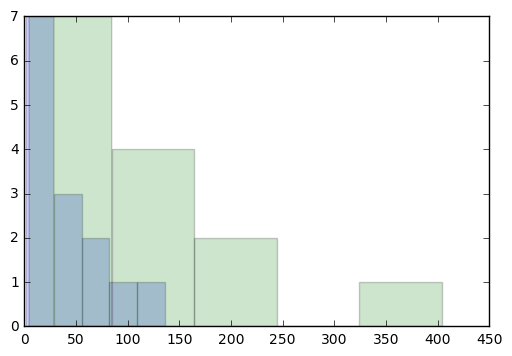

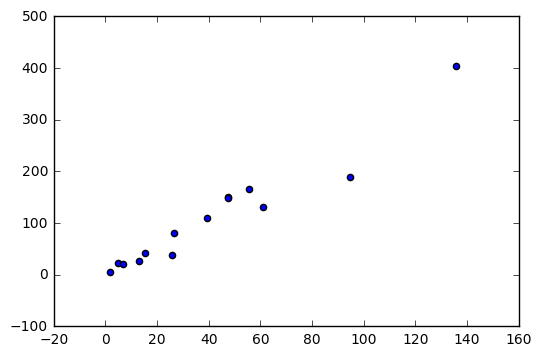

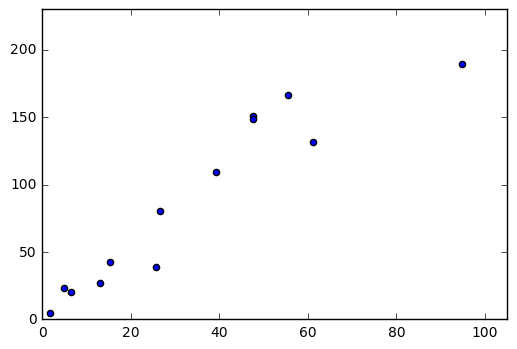

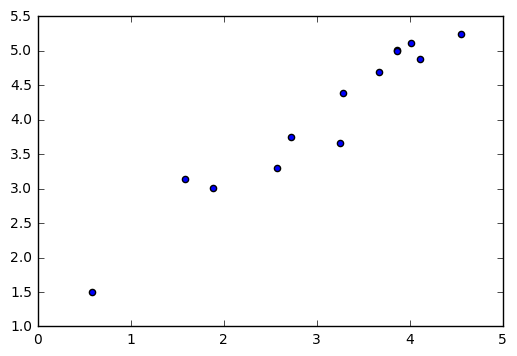

0.0296768696806
0.0115493352115
0.0026613164075
0.000471531766888
0      14.2
1      27.1
2      12.9
3       2.7
4      18.1
5     110.9
6      70.4
7      53.4
8     103.2
9      13.7
10     95.0
11     70.2
12    268.6
13    101.4
dtype: float64


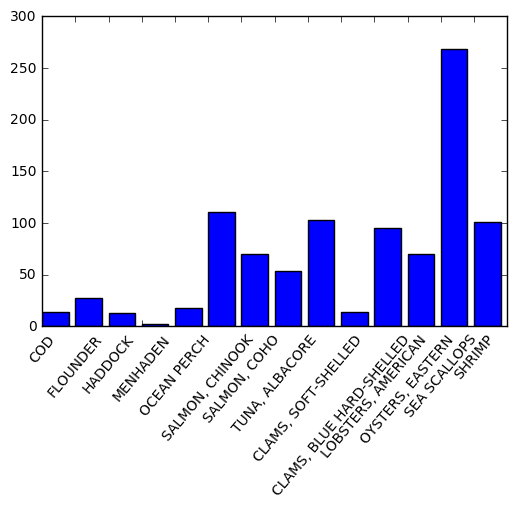

In [112]:
fish_data=pd.read_table('fish_prices.csv')
fish_data.head()
older=fish_data['Price_1970']

newer= fish_data['Price_1980']
plt.hist(older,bins=5,alpha=0.2)
plt.xlim(0,450)
plt.hist(newer,bins=5,alpha=0.2)
plt.show()

plt.scatter(older,newer)
plt.show()
filtered_data_newer=newer[newer<300]
filtered_data_older=older[older<120]
plt.scatter(filtered_data_older,filtered_data_newer)
plt.xlim(0,105)
plt.ylim(0,230)
plt.show()
log_older=np.log(filtered_data_older)
log_newer=np.log(filtered_data_newer)
plt.scatter(log_older,log_newer)
plt.show()
print(st.ttest_ind(older,newer).pvalue)
print(st.ttest_ind(filtered_data_older,filtered_data_newer).pvalue)
print(st.ttest_rel(older,newer).pvalue)
print(st.ttest_rel(filtered_data_older,filtered_data_newer).pvalue)
difference_price=newer-older
print(difference_price)
plt.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13],difference_price)

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],fish_data.Type_Fish,rotation=50)
plt.show()

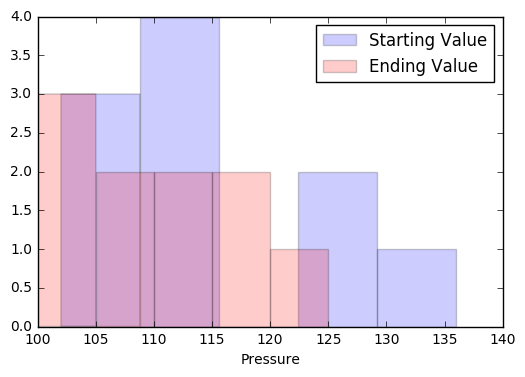

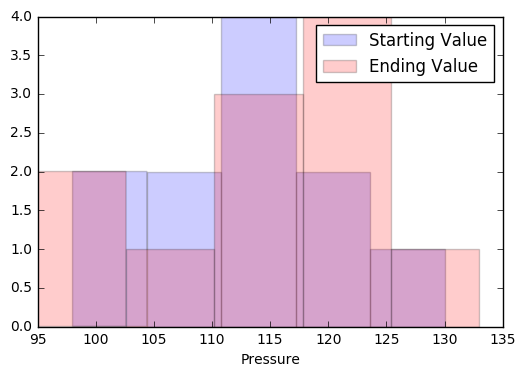

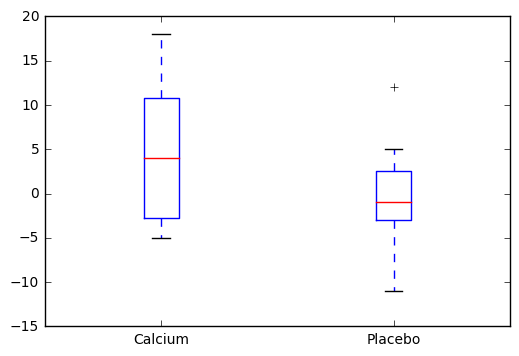

0.103996399978
0.726648896078


In [182]:
blood_data=pd.read_table('ca_bp.csv')
blood_data

calcium_treatment=blood_data.loc[blood_data['Treatment'] == 'Calcium']
placebo_treatment=blood_data.loc[blood_data['Treatment'] == 'Placebo']
plt.hist(calcium_treatment["Begin"],alpha=0.2,bins=5,label='Starting Value')
plt.hist(calcium_treatment["End"],alpha=0.2,bins=5,color='red',label='Ending Value')
plt.xlabel("Pressure")
plt.legend()
plt.show()

plt.hist(placebo_treatment["Begin"],alpha=0.2,bins=5,label='Starting Value')
plt.hist(placebo_treatment["End"],alpha=0.2,bins=5,color='red',label='Ending Value')
plt.xlabel("Pressure")
plt.legend()
plt.show()

plt.boxplot([calcium_treatment['Decrease'],placebo_treatment['Decrease']])
plt.xticks([2,1],{'Calcium','Placebo'})
plt.show()
print(st.ttest_rel(calcium_treatment.Begin,calcium_treatment.End).pvalue)
print(st.ttest_rel(placebo_treatment.Begin,placebo_treatment.End).pvalue)





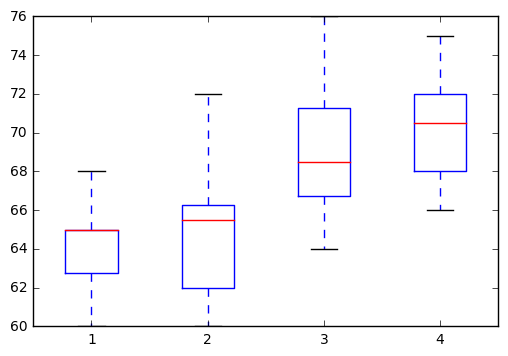

1.73538025495e-10
0.0913573177516
0.591611511231
1.89982991454e-07
0.000101069342744


In [215]:
singer_data=pd.read_table('singer_heights.csv')

filtered_data=singer_data.dropna()

plt.boxplot([filtered_data.Soprano,

filtered_data.Alto,

filtered_data.Tenor,

filtered_data.Bass])
plt.show()
men_data=filtered_data.Bass+filtered_data.Tenor
women_data=filtered_data.Soprano+filtered_data.Alto
print(st.ttest_ind(men_data,women_data).pvalue)
print(st.ttest_rel(filtered_data.Tenor,filtered_data.Bass).pvalue)
print(st.ttest_rel(filtered_data.Alto,filtered_data.Soprano).pvalue)
print(st.ttest_rel(filtered_data.Alto,filtered_data.Bass).pvalue)
print(st.ttest_rel(filtered_data.Tenor,filtered_data.Soprano).pvalue)


